In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [3]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [6]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['vb_ros_mean']

### Load Chemical Annotation Data
### Reference : https://gigadb.org/dataset/100351

In [8]:
# Chemical annotation 
chem_dat = pd.read_csv('chemical_annotations.csv')
chem_dat

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
30611,BRD-K47092271-001-01-7,BRD-K47092271,BROAD_CPD_ID,SA799574,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCC(=O)Nc1ccc2O[C@@H]3[C@@H](C[C@H](CC(=O)NCC...,NaN
30612,BRD-K30358777-001-01-0,BRD-K30358777,BROAD_CPD_ID,SA800605,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COc1ccc(CNC(=O)C[C@@H]2C[C@H]3[C@H](Oc4ccc(NC(...,NaN
30613,BRD-K32423836-001-01-9,BRD-K32423836,BROAD_CPD_ID,SA799806,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCCNC(=O)C[C@H]1C[C@@H]2[C@@H](Oc3ccc(NC(=O)C...,NaN
30614,BRD-K28250273-001-01-2,BRD-K28250273,BROAD_CPD_ID,SA1482018,Azetidine Nitrile Full Library,Broad Institute of MIT and Harvard,NaN,NaN,OC[C@H]1[C@H]([C@H](C#N)N1C(=O)Nc1cccc(F)c1)c1...,NaN


In [9]:
# Load validation datasets
x_val_dat = pd.read_csv('x_val_df.csv')
x_val_meta = pd.read_csv('x_val_meta.csv')

In [10]:
# Check unique compound in validation dataset
compound = x_val_meta['Metadata_broad_sample'].unique()
len(compound)

30617

# 2. Regression Model Formation & Accuracy Check

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Various Regression Models
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Support Vector Regressor' : SVR(),
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor(),
    'Bayesian Ridge' : BayesianRidge(),
    'Elastic Net' : ElasticNet(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'MLP Regressor' : MLPRegressor(),
    'XGBoost Regressor' : XGBRegressor(),
    'LightGBM Regressor' : LGBMRegressor()
}



# Parameter grids for linear models and tree-based models
linear_param_grids = {
    'Ridge Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Support Vector Regression' : {'C' : [0.1, 1.0, 10.0], 'epsilon' : [0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor' : {'n_neighbors' : [3, 5, 7, 9]},
    'Bayesian Ridge' : {},
    'Elastic Net' : {'alpha' : [0.1, 1.0, 10.0], 'l1_ratio' : [0.1, 0.5, 0.9]}
}

tree_param_grids = {
    'Decision Tree Regressor' : {'max_depth' : [None, 10, 20, 30]},
    'Random Forest Regressor' : {'n_estimators' : [100, 200, 300], 'max_depth' : [None, 10, 20]},
    'Gradient Boosting Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'AdaBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 1.0]},
    'MLP Regressor' : {'hidden_layer_sizes' : [(50,), (100,), (50, 50)], 'alpha' : [0.0001, 0.001, 0.01]},
    'XGBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'LightGBM Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]}
}


# Results Save
best_models = {}
best_params = {}

# Model Class dict
model_classes = {
    'Ridge Regression' : Ridge,
    'Lasso Regression' : Lasso,
    'Support Vector Regression' : SVR,
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor,
    'Decision Tree Regressor' : DecisionTreeRegressor,
    'Random Forest Regressor' : RandomForestRegressor,
    'Gradient Boosting Regressor' : GradientBoostingRegressor,
    'Bayesian Ridge' : BayesianRidge,
    'Elastic Net' : ElasticNet,
    'AdaBoost Regressor' : AdaBoostRegressor,
    'MLP Regressor' : MLPRegressor,
    'XGBoost Regressor' : XGBRegressor,
    'LightGBM Regressor' : LGBMRegressor    
}

# GridSearchCV and training loop for linear models
for model_name, param_grid in linear_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_


    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')

# GridSearchCV and training loop for tree-based models
for model_name, param_grid in tree_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameteres: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')



# Output the best parameters & r2 score for each model
print('Best parameters:')
for model_name, params in best_params.items():
    print(f'{model_name} : {params}')

Ridge Regression Best Parameters: {'alpha': 100.0}
Ridge Regression (After tuning):
  Mean Squared Error = 0.17864016877058442
  Root Mean Squared Error = 0.42265845403893726
  R² Score = 0.18677216578823608

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression (After tuning):
  Mean Squared Error = 0.23417728856394718
  Root Mean Squared Error = 0.48391867970140107
  R² Score = -0.0660507684865137

Support Vector Regression Best Parameters: {'C': 10.0, 'epsilon': 0.01}
Support Vector Regression (After tuning):
  Mean Squared Error = 0.21628485161570907
  Root Mean Squared Error = 0.4650643521231326
  R² Score = 0.015401392291909066

K-Nearest Neighbors Regressor Best Parameters: {'n_neighbors': 3}
K-Nearest Neighbors Regressor (After tuning):
  Mean Squared Error = 0.2753747580913622
  Root Mean Squared Error = 0.5247616202537703
  R² Score = -0.25359497620505

Bayesian Ridge Best Parameters: {}
Bayesian Ridge (After tuning):
  Mean Squared Error = 0.1830587341587506
  Ro

## Regression Results

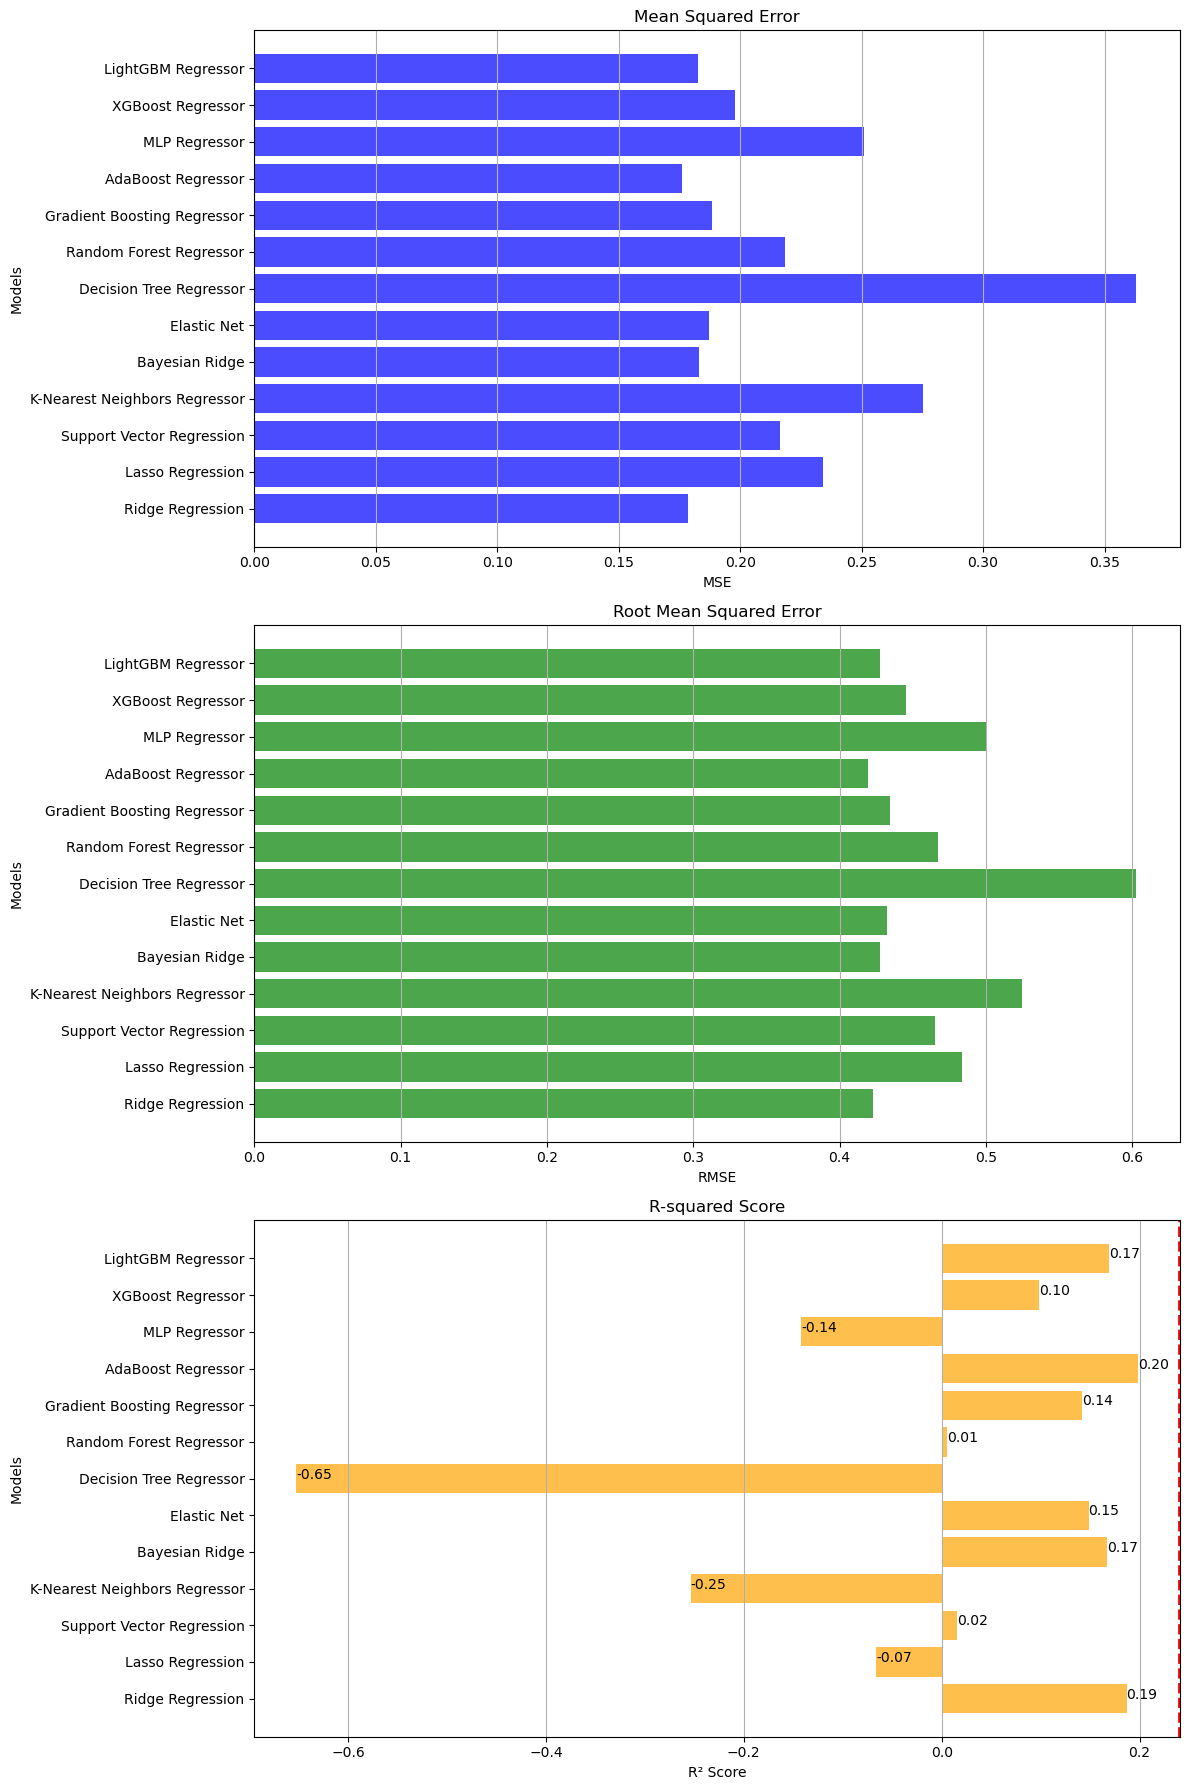

In [12]:
# Initialize lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []


# Evaluate and collect scores for each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)


    # Valculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store scores and model names
    model_names.append(model_name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


# Plotting the scores
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))


# Mean Squared Error plot
ax1.barh(model_names, mse_scores, color='blue', alpha=0.7)
ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.set_ylabel('Models')
ax1.xaxis.grid(True)

# Root Mean Squared Error plot
ax2.barh(model_names, rmse_scores, color='green', alpha=0.7)
ax2.set_title('Root Mean Squared Error')
ax2.set_xlabel('RMSE')
ax2.set_ylabel('Models')
ax2.xaxis.grid(True)

# R-squared plot
ax3.barh(model_names, r2_scores, color='orange', alpha=0.7)
for model_name, scores in zip(model_names, r2_scores):
    ax3.text(scores, model_name, f'{scores:.2f}')
ax3.set_title('R-squared Score')
ax3.set_xlabel('R² Score')
ax3.set_ylabel('Models')
ax3.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax3.xaxis.grid(True)

plt.tight_layout()
plt.savefig('accuracy_results.png')
plt.show()

# 3. Cell Health Labeling for Classification Model

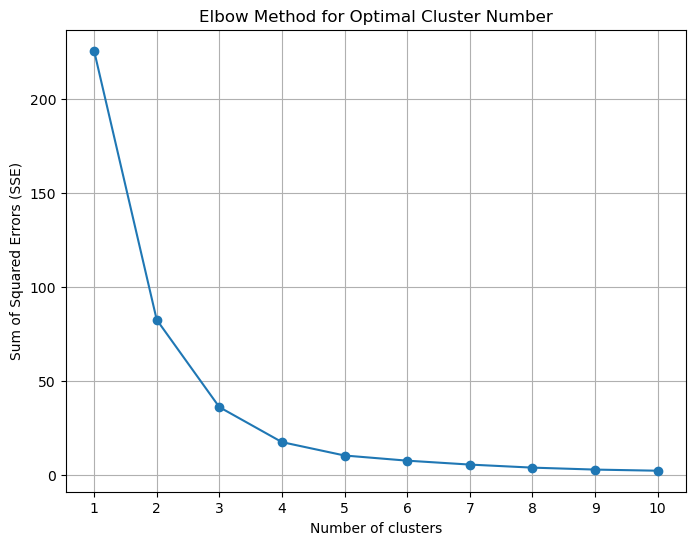

In [13]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png')
plt.show()

In [14]:
# y_df Categorized

kmeans = KMeans(n_clusters = 5, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [23]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 340, 1: 17})

In [21]:
#np.where(y_df_binarized == 3)

(array([  2,   3,   4,   8,  11,  13,  16,  17,  19,  20,  24,  27,  34,
         38,  39,  41,  43,  44,  45,  46,  47,  52,  53,  56,  57,  58,
         59,  65,  68,  70,  71,  73,  74,  76,  77,  79,  80,  81,  82,
         83,  87,  92,  93,  97, 104, 108, 109, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 152, 153,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 179, 181, 184, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201,
        202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
        215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228,
        229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 245,
        247, 249, 250, 252, 253, 258, 261, 268, 272, 274, 275, 276, 277,
        280, 285, 288, 291, 292, 295, 298, 300, 301

In [16]:
#y_df.sort_values(ascending = False).to_excel('y_df.xlsx')

In [22]:
# Remapping
mapping = {1: 0, 0: 0, 3: 0, 5: 0, 2: 1, 4: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [285]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# 4. Classification Model Formation & Check Accuracy

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy for RandomForest: 0.9518

Test Accuracy for RandomForest: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.00      0.00      0.00         3

    accuracy                           0.97       108
   macro avg       0.49      0.50      0.49       108
weighted avg       0.95      0.97      0.96       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validat

## Classification Accuracy

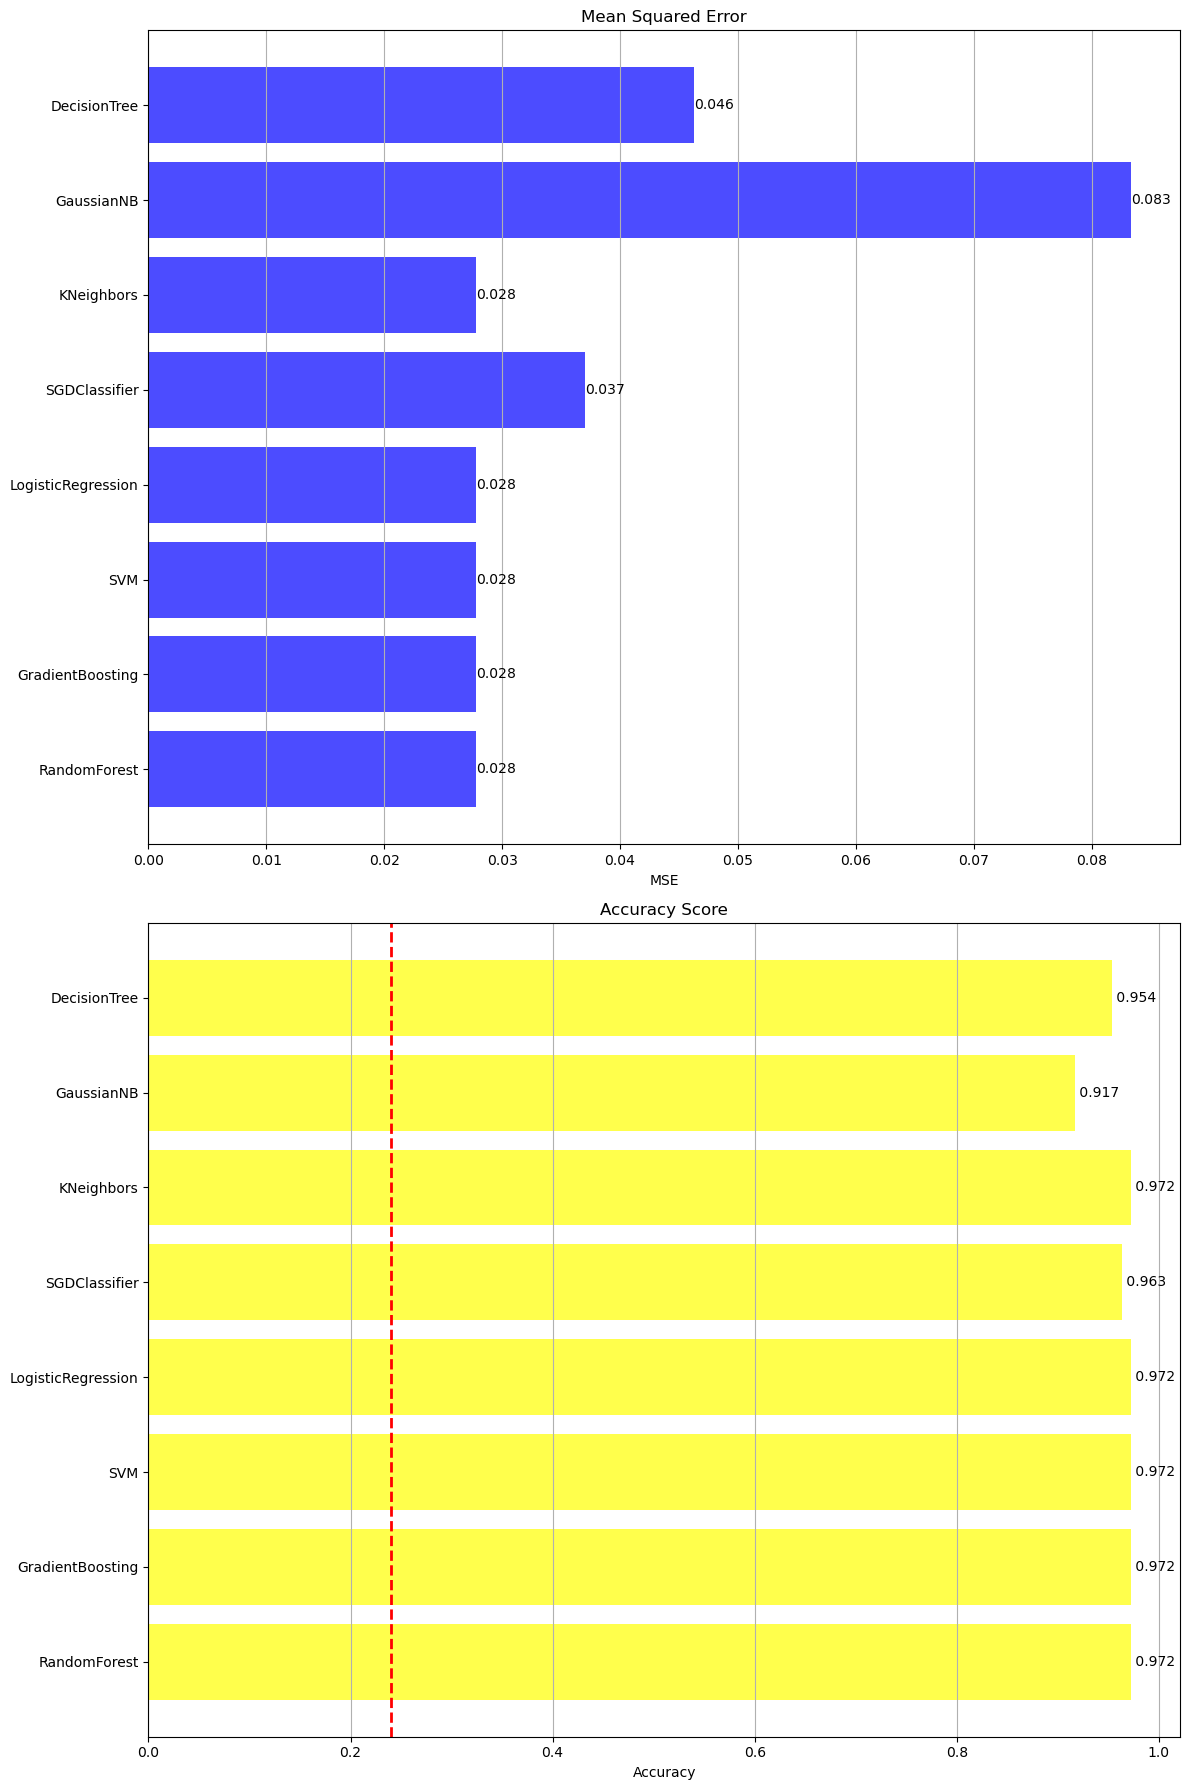

In [287]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 18))

for model, metrics in results.items():
    ax1.barh(model, metrics['mse'], color = 'blue', alpha = 0.7)
    ax1.text(metrics['mse'], model, f"{metrics['mse']:.3f}", va = 'center')
    ax2.barh(model, metrics['accuracy'], color = 'yellow', alpha = 0.7)
    ax2.text(metrics['accuracy'], model, f"{metrics['accuracy']: .3f}", va = 'center')



ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.xaxis.grid(True)

ax2.set_title('Accuracy Score')
ax2.set_xlabel('Accuracy')
ax2.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax2.xaxis.grid(True)

plt.tight_layout()
plt.savefig('X.png')
plt.show()

# 5. Deep Learning Model Formation & Check Accuracy

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [289]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [290]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_sample_weight


# Setting same seed number
tf.random.set_seed(42)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Model define
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model Compile
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 128)            │        94,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,217 (411.00 KB)

 Trainable params: 105,217 (411.00 KB)

 Non-trainable params: 0 (0.00 B)

In [291]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback]
                   )

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3725 - loss: 0.8439 - val_accuracy: 0.9352 - val_loss: 0.4054
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9166 - loss: 0.4185 - val_accuracy: 0.9722 - val_loss: 0.2787
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9336 - loss: 0.3167 - val_accuracy: 0.9722 - val_loss: 0.2214
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.2490 - val_accuracy: 0.9722 - val_loss: 0.1831
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.2064 - val_accuracy: 0.9722 - val_loss: 0.1545
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9613 - loss: 0.1706 - val_accuracy: 0.9722 - val_loss: 0.1348
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1665 - val_accuracy: 0.9722 - val_loss: 0.1214
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1781 - val_accuracy: 0.9722 - val_loss: 0.1193

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9764 - loss: 0.2454  
Test Accuracy of the Best Model: 0.9722
Test loss of the Best Model :  0.2787


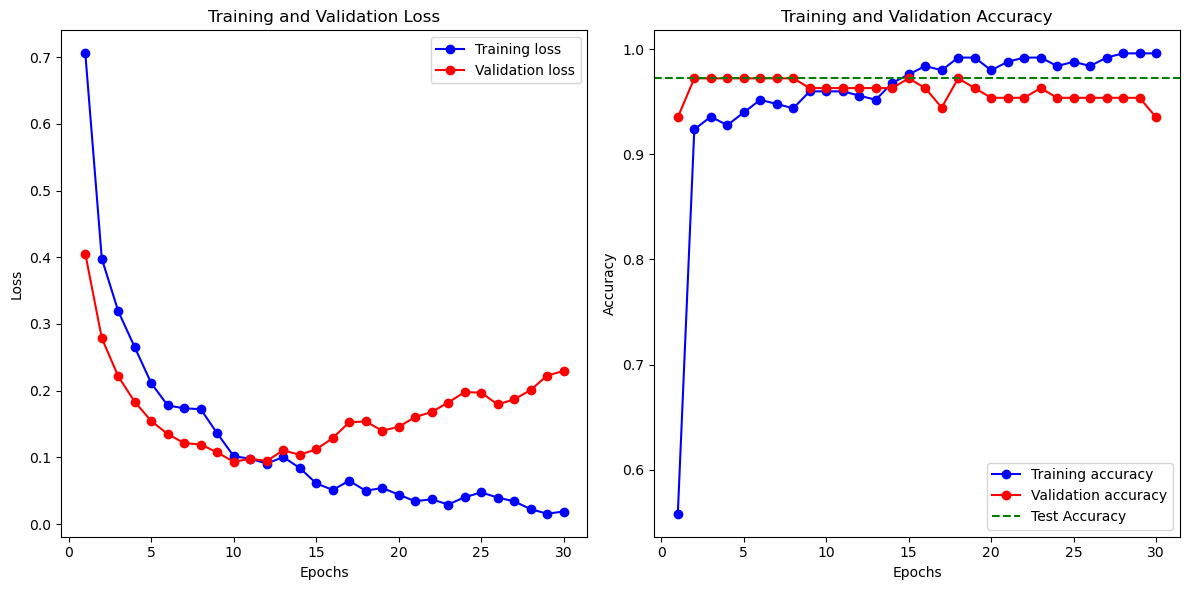

In [292]:
# Save Best Model
best_model = keras.models.load_model('best_model.keras')

# Test data evaluation
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Accuracy of the Best Model: {test_accuracy:.4f}')
print(f'Test loss of the Best Model : {test_loss: .4f}')

# Assesment scores
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Deep learning results.png')
plt.show()

## Deep Learning Model Results

In [310]:
# Load Deep Learning Best Model
best_model = keras.models.load_model('best_model.keras')
best_model.fit(X_train, y_train)


# Confusion Matrix
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

classfication_res = classification_report(y_test, y_pred)
print(classfication_res)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9203 - loss: 0.3416  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.00      0.00      0.00         3

    accuracy                           0.97       108
   macro avg       0.49      0.50      0.49       108
weighted avg       0.95      0.97      0.96       108



## Best Model Confusion Matrix & ROC Curve

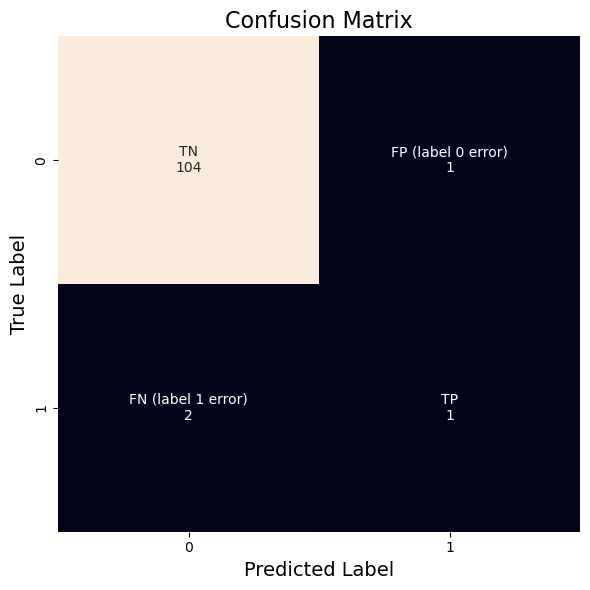

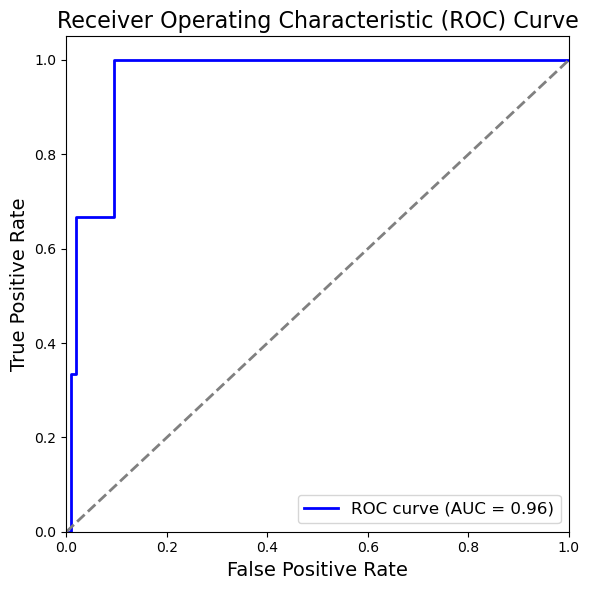

In [299]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = LogisticRegression(C=0.1, penalty='l2', random_state=42)
best_model.fit(X_train, y_train)


# Confusion Matrix
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

# 6. Prediction with validation dataset

In [44]:
# Load Validation Data
x_val_df = pd.read_csv('x_val_df.csv')
x_val_df = x_val_df.iloc[:, 1:]
x_val_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,0.001517,0.277820,0.504330,0.872770,-0.062229,-0.097463,-0.136418,1.363021,-0.121675,0.111071,...,0.012441,-0.515965,-0.125886,0.378361,-0.192612,0.263924,0.134799,-0.065563,0.159910,0.150347
1,0.034036,0.090993,0.306434,0.485507,0.052555,-0.031708,-0.116941,0.108810,-0.257286,0.182884,...,0.148373,-0.708293,-0.168461,0.159921,0.005949,0.278903,0.181974,0.119256,0.289176,0.263372
2,-0.418352,-0.452332,0.874477,-0.128444,0.677804,0.464805,0.139284,0.689670,0.092896,-0.396120,...,1.174464,1.873223,0.559107,1.438213,1.659821,1.049936,1.254289,0.822218,1.143912,1.200041
3,-0.302987,-0.107649,0.926159,0.397246,0.287252,-0.666721,0.485750,0.286509,-0.249060,0.851031,...,0.402387,-0.358765,-0.296739,0.925500,-0.294972,0.741252,0.544289,-0.375331,0.497514,0.527436
4,1.015297,0.971762,-0.344257,0.236280,-0.908705,0.246192,-1.322807,0.577879,-0.200651,0.544807,...,1.195175,-0.566205,-0.462147,0.560941,-0.435885,1.580252,1.477814,-0.779816,1.448586,1.502258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,-0.265613,-0.433268,0.493264,-0.545809,0.505944,-0.235360,0.530636,0.305867,-0.243942,-0.247084,...,-0.166256,-0.606686,-1.410230,-1.127026,-0.063554,-0.134207,-0.174389,0.904218,-0.093846,-0.130101
30613,-0.210157,-0.305976,0.503456,-0.028201,0.453887,0.195480,0.276551,0.262468,0.886899,-0.258701,...,-0.326757,-0.692443,-1.197271,-1.103457,0.064433,-0.189828,-0.262928,0.950440,-0.374726,-0.343942
30614,0.597644,0.486508,-0.388333,-0.393189,-0.434949,0.348865,-0.739404,-0.280500,0.231109,-0.160809,...,0.281298,-0.558976,-0.394671,-0.123102,-0.271379,0.429285,0.213798,-0.222311,0.061249,0.132184
30615,0.806925,0.851465,-0.373886,0.048235,-0.452466,-0.217211,-0.818209,0.555877,0.007761,0.535272,...,0.762975,-1.044746,-0.611885,0.340107,-0.832198,0.986590,0.869581,-1.017756,0.612146,0.618390


In [45]:
# Validation metadata
x_val_meta = pd.read_csv('x_val_meta.csv')
x_val_meta = x_val_meta.iloc[:, 1:]

In [301]:
# Validation
y_pred = best_model.predict(x_val_df)

In [302]:
# Check location of DNA Damage High Labeld Data
hit_comp = np.flatnonzero(y_pred == 1)

In [303]:
comp_name = []
for idx in hit_comp:
    value = x_val_meta.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]['CPD_NAME'].tolist()
    comp_name.append(name)

# Remove DMSO
comp_name = [v for v in comp_name if v]

print(len(comp_name))
print(display(comp_name))

1496


[['quinpirole'],
 ['5-methoxytryptamine'],
 ['A-68930'],
 ['L-hyoscyamine'],
 ['estrone'],
 ['kynurenic acid'],
 ['piperacillin'],
 ['Beta CCP'],
 ['RS 102221'],
 ['RS 504393'],
 ['3-hydroxycoumarin'],
 ['5-carboxamidotryptamine'],
 ['mevastatin'],
 ['chromocarb'],
 ['citropten'],
 ['Boc-GVV-CHO'],
 ['L-693,403'],
 ['naltrexone'],
 ['17-phenyl-trinor-prostaglandin E2'],
 ['W-7'],
 ['2-[1-(4-PIPERONYL)PIPERAZINYL]BENZOTHIAZOLE'],
 ['LY-255283'],
 ['n6-methyladenosine'],
 ['LY-255283'],
 ['quercetin'],
 ['proxyphylline'],
 ['eriodictyol'],
 ['CGP 52432'],
 ['enilconazole'],
 ['wiskostatin'],
 ['7-hydroxy-2-N,N-dipropylaminotetralin'],
 ['pseudopelletierine'],
 ['acebutolol'],
 ['glafenine'],
 ['deoxykhivorin'],
 ['4-PHENYL-1,2,3,4-TETRAHYDROISOQUINOLINE'],
 ['entandrophragmin'],
 ['metolachlor'],
 ['oxeprenolol'],
 ['RS 39604'],
 ['AMN 082 dihydrochloride'],
 ['dimaprit'],
 ['3-BROMO-7-NITROINDAZOLE'],
 ['N-acetylserotonin'],
 ['calcitriol'],
 ['rhein'],
 ['phenylpropanolamine'],
 ['cefa

None


In [132]:
comp_list = pd.DataFrame()
for idx in hit_comp:
    value = x_val_meta.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]

    comp_list = pd.concat([comp_list, name], ignore_index = True)



comp_list.to_excel('comp_list.xlsx')